<a href="https://colab.research.google.com/github/AnjaliMizJ/Data-Science-Project/blob/main/Cirhossis_Intro2NeuralNets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [5]:
from matplotlib.colors import ListedColormap
cmap_bold = ListedColormap(['FF0000','#0000ff'])
cmap_light = ListedColormap(['FFBBBB','#BBBBff'])


## MV Logistic Regression Class

## Cirhosis Dataset

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Dataset/Cirrhosis.csv')
data.head()

,index,duration,status,drug,age,sex,ascites,hepatomology,spiders,edema,bilirubin,cholesterol,albumin,copper,phosphatase,SGOT,triglicerides,platelets,prothrombin,stage
0,1,400,2,1,21464,1,1,1,1,1.0,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4
1,2,4500,0,1,20617,1,0,1,1,0.0,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3
2,3,1012,2,1,25594,0,0,0,0,0.5,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4
3,4,1925,2,1,19994,1,0,1,1,0.5,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4
4,5,1504,1,2,13918,1,0,1,1,0.0,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3


In [4]:
data.dtypes

,0
index,int64
duration,int64
status,int64
drug,int64
age,int64
sex,int64
ascites,int64
hepatomology,int64
spiders,int64
edema,float64


In [5]:
#replacing the targets to generate the sequence from 0
data.stage = data.stage.replace(1,0)
data.stage = data.stage.replace(2,1)
data.stage = data.stage.replace(3,2)
data.stage = data.stage.replace(4,3)

data.stage.unique()

array([3, 2, 1, 0])

In [6]:
# Normalizing the features with more than 2 digit numbers
data.duration = data.duration // 1000
data.age = data.age // 1000
data.cholesterol = data.cholesterol // 100
data.copper = data.copper // 100
data.phosphatase = data.phosphatase // 1000
data.SGOT = data.SGOT // 100
data.triglicerides = data.triglicerides // 100
data.platelets = data.platelets // 100


In [7]:
#data.head()

In [8]:

data.isnull().sum()

,0
index,0
duration,0
status,0
drug,0
age,0
sex,0
ascites,0
hepatomology,0
spiders,0
edema,0


In [9]:
data = data.dropna()

In [10]:
data.head()

,index,duration,status,drug,age,sex,ascites,hepatomology,spiders,edema,bilirubin,cholesterol,albumin,copper,phosphatase,SGOT,triglicerides,platelets,prothrombin,stage
0,1,0,2,1,21,1,1,1,1,1.0,14.5,2.0,2.60,1.0,1.0,1.0,1.0,1.0,12.2,3
1,2,4,0,1,20,1,0,1,1,0.0,1.1,3.0,4.14,0.0,7.0,1.0,0.0,2.0,10.6,2
2,3,1,2,1,25,0,0,0,0,0.5,1.4,1.0,3.48,2.0,0.0,0.0,0.0,1.0,12.0,3
3,4,1,2,1,19,1,0,1,1,0.5,1.8,2.0,2.54,0.0,6.0,0.0,0.0,1.0,10.3,3
4,5,1,1,2,13,1,0,1,1,0.0,3.4,2.0,3.53,1.0,0.0,1.0,0.0,1.0,10.9,2


In [11]:
data.columns

Index(['index', 'duration', 'status', 'drug', 'age', 'sex', 'ascites',
       'hepatomology', 'spiders', 'edema', 'bilirubin', 'cholesterol',
       'albumin', 'copper', 'phosphatase', 'SGOT', 'triglicerides',
       'platelets', 'prothrombin', 'stage'],
      dtype='object')

In [12]:
data.describe()

,index,duration,status,drug,age,sex,ascites,hepatomology,spiders,edema,bilirubin,cholesterol,albumin,copper,phosphatase,SGOT,triglicerides,platelets,prothrombin,stage
count,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000
mean,158.615942,1.496377,0.869565,1.507246,17.692029,0.876812,0.068841,0.514493,0.289855,0.106884,3.333696,3.231884,3.516812,0.536232,1.503623,0.710145,0.728261,2.137681,10.735507,2.039855
std,91.662926,1.145737,0.959743,0.500856,3.848411,0.329250,0.253643,0.500698,0.454519,0.270333,4.601074,2.371926,0.404789,0.891654,2.159963,0.673692,0.754669,0.973780,1.008315,0.853999
min,1.000000,0.000000,0.000000,1.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.300000,1.000000,1.960000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000
25%,79.750000,1.000000,0.000000,1.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.800000,2.000000,3.310000,0.000000,0.000000,0.000000,0.000000,2.000000,10.000000,1.000000
50%,157.500000,1.000000,0.000000,2.000000,18.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.400000,3.000000,3.545000,0.000000,1.000000,1.000000,1.000000,2.000000,10.600000,2.000000
75%,240.250000,2.000000,2.000000,2.000000,20.000000,1.000000,0.000000,1.000000,1.000000,0.000000,3.525000,4.000000,3.772500,1.000000,2.000000,1.000000,1.000000,3.000000,11.200000,3.000000
max,312.000000,4.000000,2.000000,2.000000,28.000000,1.000000,1.000000,1.000000,1.000000,1.000000,28.000000,17.000000,4.400000,5.000000,13.000000,4.000000,5.000000,5.000000,17.100000,3.000000


In [13]:
y = data['stage'].to_numpy()
X = data[['duration', 'status', 'drug', 'age', 'sex', 'ascites',
       'hepatomology', 'spiders', 'edema', 'bilirubin', 'cholesterol',
       'albumin', 'copper', 'phosphatase', 'SGOT', 'triglicerides',
       'platelets', 'prothrombin', 'stage']].to_numpy()


In [14]:
X.shape

(276, 19)

In [15]:
y.shape

(276,)

# 2-Layer Perceptron (Feed Forward Neural Net)

## Activation Functions

In [16]:
def linear(H):
  return H


def ReLU(H):
  return H*(H>0)


def sigmoid(H):
  return 1/(1+np.exp(-H))


def softmax(H):
  eH = np.exp(H)
  return eH/eH.sum(axis=1, keepdims=True)


## Useful Functions

In [17]:
def one_hot_encode(y):
  N = len(y)
  K= len(set(y))
  Y = np.zeros((N,K))
  for i in range(N):
    Y[i, y[i]]=1
  return Y


def cross_entropy(Y, P_hat):
  return -np.sum(Y*np.log(P_hat))


def accuracy(y, y_hat):
  return np.mean(y==y_hat)


## |Shallow ANN Class|

In [18]:
class shallow_ANN():

  def fit(self, X, y, neurons = 5, eta = 1e-3, epochs = 1e3, show_curve = False):
    epochs= int(epochs)
    N,D = X.shape
    Y = one_hot_encode(y)
    K = Y.shape[1]

    #Initialize weights and biases
    self.W = {l : np.random.randn(M[0], M[1]) for l, M in enumerate(zip([D,neurons],[neurons,K]),1)}
    self.B = {l : np.random.randn(M) for l, M in enumerate([neurons, K],1)}

   # self.W = {l: np.random.randn(M[0],M[1]) for l, M in enumerate(zip([D,neurons],[neurons,K]), 1)}
    #self.B = {l: np.random.randn(M) for l, M in enumerate([neurons, K],1)}

    #define activations
    self.a = {1 : np.tanh, 2: softmax}

    J = np.zeros(epochs)

    for epoch in range(epochs):
      self.__forward__(X)
      J[epoch] = cross_entropy(Y, self.Z[2])

      #Weight Update for layer2
      self.W[2] -=eta * (1/N)* self.Z[1].T@(self.Z[2]-2)
      self.B[2] -=eta * (1/N)* (self.Z[2]-Y).sum(axis=0)

      #Weight Update for layer1
      self.W[1] -= eta*(1/N)*X.T@((self.Z[2]-Y)@self.W[2].T*(1-self.Z[1]**2))
      self.B[1] -= eta*(1/N)*((self.Z[2]-Y)@self.W[2].T*(1-self.Z[1]**2)).sum(axis=0)


    #stochastic gradient descent
    if show_curve:
      plt.figure()
      plt.plot(J)
      plt.xlabel('epochs')
      plt.ylabel('$\mathcal{J}$')
      plt.title('Training Curve')
      plt.show()


  def __forward__(self, X):
    self.Z = {0: X}
    for l in sorted(self.W.keys()):
      self.Z[l] = self.a[l](self.Z[l-1]@self.W[l]+self.B[l])


  def predict(self, X):
    self.__forward__(X)
    return self.Z[2].argmax(axis = 1)

## Implement shallow ANN Class

In [47]:
def main():
  D =2
  K = 3
  N= int(K*1e3)






  plt.figure()
  plt.scatter(X[:,0],X[:,1], c=y , s= 5)

  my_ann = shallow_ANN()
  my_ann.fit(X, y, neurons= 20, eta=2e-1, epochs = 1e6, show_curve= True )
  y_hat =my_ann.predict(X)

  print("Accuracy: ", accuracy(y, y_hat))
  print(my_ann.W)
  print(my_ann.B)

  plt.figure()
  plt.scatter(X[:,0],X[:,1], c=y_hat , s= 5)

<ipython-input-16-d47a0e6b34ad>:14: RuntimeWarning: overflow encountered in exp
  eH = np.exp(H)
<ipython-input-16-d47a0e6b34ad>:15: RuntimeWarning: invalid value encountered in divide
  return eH/eH.sum(axis=1, keepdims=True)
<ipython-input-17-7c3439c53bec>:11: RuntimeWarning: divide by zero encountered in log
  return -np.sum(Y*np.log(P_hat))
<ipython-input-17-7c3439c53bec>:11: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(Y*np.log(P_hat))


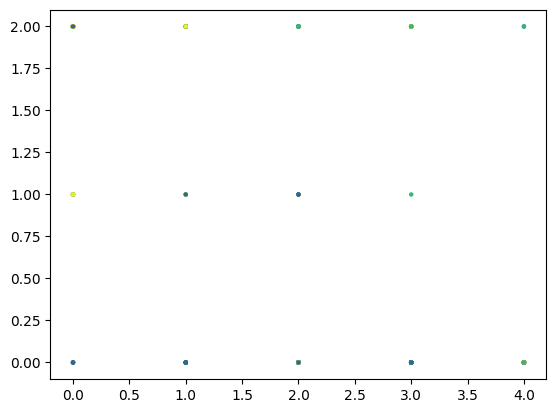

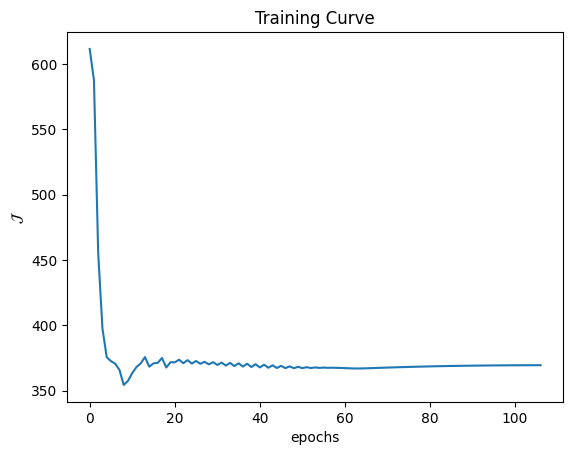

Accuracy:  0.043478260869565216
{1: array([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, 

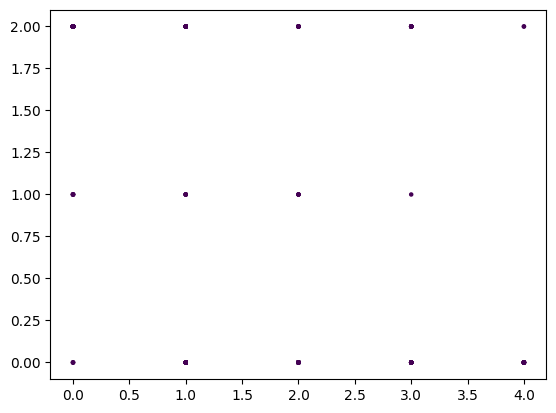

In [48]:
if __name__=="__main__":
  main()

# Variable architecture network with Back Propagation

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [ ]:
cmap_bold = ListedColormap(["#FF0000", "#00FF00","#0000FF"])
cmap_light = ListedColormap(["#FFBBBB", "#BBFFBB","#BBBBFF"])

## Useful Functions

In [ ]:
# Activations

def linear(H):
  return H


def ReLU(H):
  return H*(H>0)


def sigmoid(H):
  return 1/(1+np.exp(-H))


def softmax(H):
  eH = np.exp(H)
  return eH/eH.sum(axis=1, keepdims=True)



# Loss Fucntions

def cross_entropy(Y, P_hat):
  return -(1/len(Y))*np.sum(Y*np.log(P_hat))

def OLS(Y, Y_hat):
  return (1/(2*len(Y)))*np.sum((Y-Y_hat)**2)


# Misc

def one_hot(y):
  N = len(y)
  K= len(set(y))
  Y = np.zeros((N,K))
  for i in range(N):
    Y[i, y[i]]=1
  return Y

def accuracy(y, y_hat):
  return np.mean(y==y_hat)

def R2(y, y_hat):
  return 1-np.mean((y-y_hat)**2)/np.sum((y-y.mean())**2)


## Derivatives Activations

In [ ]:
def derivative(Z, a):
  if a == linear:
    return 1
  elif a==sigmoid:
    return Z*(1-Z)
  elif a==np.tanh:
    return 1-Z*Z
  elif a==ReLU:
    return (Z>0).astype(int)

  else:
    ValueError("Unknown Activation")

## Artificial Neuaral Network | ANN Class

In [ ]:
class ANN():
  def __init__(self, architecture, activations = None, mode=0):
    self.mode = mode
    self.architecture = architecture
    self.activations = activations
    self.L = len(architecture) + 1


  def fit(self, X, y, eta = 1e-3, epochs = 1e3, show_curve = False):
    epochs = int(epochs)
    if self.mode:
      Y=y
      K=1
    else:
      Y = one_hot(y)
      K = Y.shape[1]

    N, D = X.shape

    #Initialize weights and Biases
    self.W = {l: np.random.randn(M[0],M[1]) for l,M in enumerate(zip(([D]+self.architecture),(self.architecture+[K])),1)}
    self.B = {l: np.random.randn(M) for l, M in enumerate(self.architecture+[K], 1)}

    #activations

    if self.activations is None:
      self.a = {1 :ReLU for l in range(1, self.L)}
    else:
      self.a = {l: act for l, act in enumerate(self.activations, 1)}


    if self.mode:
      self.a[self.L] = linear
    else:
      self.a[self.L] = softmax

    J = np.zeros(epochs)
    #gradient descent/ back propogation
    for epoch in range(epochs):
      self.__forward__(X)
      if self.mode:
        J[epoch] = OLS(Y, self.Z[self.L])
      else:
        J[epoch] = cross_entropy(Y, self.Z[self.L])

      # Back Propogation
      dH = (1/N) * (self.Z[self.L]-Y)
      for l in sorted(self.W.keys(), reverse = True):
        dW = self.Z[l-1].T@dH
        dB = dH.sum(axis = 0)

        self.W[l] -= eta*dW
        self.B[l] -= eta*dB

        if l>1:
          dZ = dH@self.W[l].T
          dH = dZ*derivative(self.Z[l-1], self.a[l-1])

    if show_curve:
        plt.figure()
        plt.plot(J)
        plt.xlabel('epochs')
        plt.ylabel('$\mathcal{J}$')
        plt.title('Training Curve')
        plt.show()


  def __forward__(self,X):
    self.Z = {0: X}
    for l in sorted(self.W.keys()):
      self.Z[l] = self.a[l](self.Z[l-1]@self.W[l]+self.B[l])

  def predict(self, X):
    self.__forward__(X)
    if self.mode:
      return self.Z[self.L]
    else:
      return self.Z[self.L].argmax(axis = 1)

## Implementation of ANN Classification

In [ ]:
def main_class():
    D = 2
    K = 3
    N = int(K*1e3)



    plt.figure()
    plt.scatter(X[:,0],X[:,1], c=y, s=6, alpha=0.6)

    my_ann_classifier = ANN(architecture=  [20,4], activations=[np.tanh, ReLU ])
    my_ann_classifier.fit(X,y ,eta=2e-1, epochs = 2e5, show_curve = True)

    y_hat = my_ann_classifier.predict(X)

    print(my_ann_classifier.W)
    print(my_ann_classifier.B)
    print(f'Training accuracy: {accuracy(y,y_hat):0.4f}')

    x1 = np.linspace(X[:,0].min() - 1, X[:,0].max() + 1, 1000)
    x2 = np.linspace(X[:,1].min() - 1, X[:,1].max() + 1, 1000)

    xx1, xx2 = np.meshgrid(x1, x2)
    Z = my_ann_classifier.predict(np.c_[xx1.ravel(),xx2.ravel()]).reshape(*xx1.shape)

    plt.figure()
    plt.pcolormesh(xx1, xx2, Z, cmap = cmap_light)
    plt.scatter(X[:,0], X[:,1], c = y, cmap = cmap_bold,alpha=0.2)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    plt.show()

    plt.figure()
    plt.scatter(X[:,0],X[:,1],c=y_hat,s=6)

In [ ]:
if __name__ == "__main__":
  main_class()

NameError: name 'plt' is not defined